In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
def csv_to_dict(path):
    df = pd.read_csv(path)
    evac_times = {}
    panics = {}
    speeds = df['avg_speed'].unique()
    sigmas = df['sigma'].unique()
    for sigma in sigmas:
        evac_times_same_sigma = np.zeros(len(speeds), dtype=np.float64)
        panics_same_sigma = np.zeros(len(speeds), dtype=np.float64)
        for idx, speed in enumerate(speeds):
            evac_time = df[(df['avg_speed'] == speed) & (df['sigma'] == sigma)]['avg_evac_time'].mean()
            panic = df[(df['avg_speed'] == speed) & (df['sigma'] == sigma)]['avg_panic'].mean()
            evac_times_same_sigma[idx] = evac_time
            panics_same_sigma[idx] = panic

        evac_times[str(sigma*100) + '%'] = evac_times_same_sigma.tolist()
        panics[str(sigma*100) + '%'] = panics_same_sigma.tolist()
    return evac_times, panics, speeds


In [34]:
def get_two_dicts(path1, path2):
    evac_times1, panics1, speeds1 = csv_to_dict(path1)
    evac_times2, panics2, speeds2 = csv_to_dict(path2)
    return evac_times1, evac_times2, panics1, panics2, speeds1

In [64]:
def plot_dicts(dict1, dict2, xs):


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    for key, values in dict1.items():
        ax1.plot(xs, values, label='speed diff:+-' + key)
    ax1.set_title("Mean evacuation time for one door")
    ax1.set_xlabel("Avg speed")
    ax1.set_ylabel("Mean evacuation time")
    ax1.set_ylim(500, 1600)
    ax1.grid()
    for key, values in dict2.items():
        ax2.plot(xs, values, label='speed diff:+-' + key)
    ax2.set_title("Mean evacuation time for two doors")
    ax2.set_xlabel("Avg speed")
    # ax2.set_ylabel("Mean panic")
    ax2.set_ylim(500, 1600)
    ax2.legend()
    ax2.grid()
    # Display the plots
    plt.tight_layout()  # Adjusts spacing between the plots
    plt.savefig('plots/evac_times_comparison.pdf', format="pdf")
    plt.show()



In [65]:
def plot_csv(path1, path2):
    evac_times1, evac_times2, panics1, panics2, speeds = get_two_dicts(path1, path2)
    plot_dicts(evac_times1, evac_times2, speeds)
    # plot_dicts(panics1, panics2, speeds)

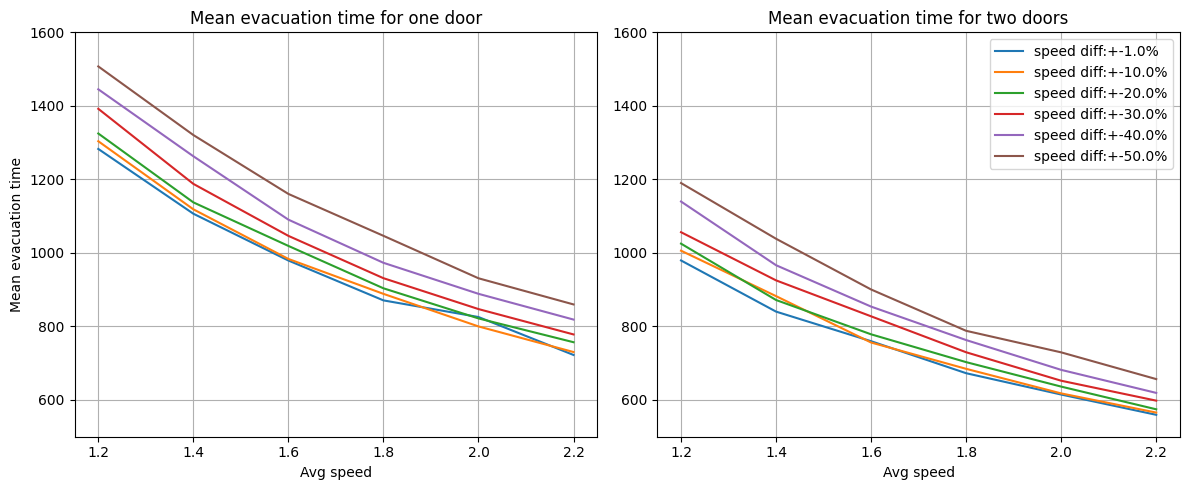

In [66]:
path1 = 'runs/one_door.csv'
path2 = 'runs/two_doors.csv'
plot_csv(path1, path2)